In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv")
data.describe()

<ipython-input-2-8c8d757f4517>:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv")


,Bottom Price,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
count,32772.0,3.277200e+04,32772.000000,32772.000000,3.277200e+04
mean,155000.0,2.682624e+05,0.017166,13.306603,2.082037e+06
std,0.0,3.857990e+05,0.024959,353.210553,5.482303e+07
min,155000.0,2.500000e+04,0.000000,0.000000,0.000000e+00
25%,155000.0,2.140000e+05,0.013806,0.000000,0.000000e+00
50%,155000.0,2.420000e+05,0.015613,0.000000,0.000000e+00
75%,155000.0,2.870000e+05,0.018516,0.000000,0.000000e+00
max,155000.0,5.550000e+07,3.580645,33740.000000,5.229700e+09


In [ ]:
y = data['Selling Price']
y.tolist()


data['x'] = 0
x = data['x']
x.tolist()
for i in range(0, len(data)):
    x[i] = i+1

print(x.min(), ", ", x.max())
print(y.min(), ", ", y.max())


<ipython-input-3-368bc32fb917>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = i+1


1 ,  32772
25000 ,  55500000


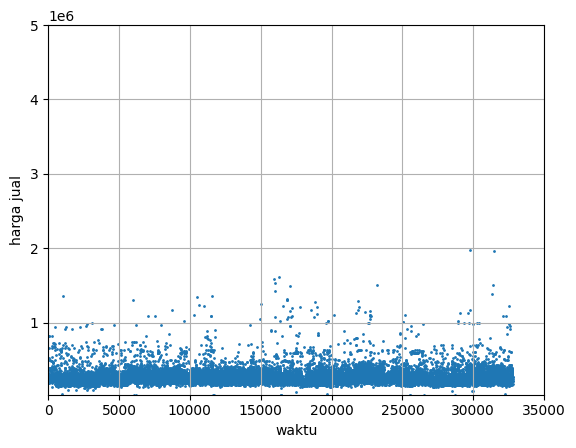

In [ ]:
# HASIL KORELASI SELLING PRICE DENGAN WAKTU (OUTLIER MASIH ADA)
plt.scatter(x, y, s=1)
plt.xlim(0, 35000)
plt.xlabel("waktu")
plt.ylabel("harga jual")
plt.ylim(30000, 5000000)
plt.grid()
plt.show()

In [ ]:
# MEMBERSIHKAN OUTLIER
total = 0
for i in range(0, len(y)):
    if y[i] > 800000:
        for j in range(i-10, i+10):
            if j >= len(y)-11:
                break
        total += y[j]
        avg = total/20
        y[i] = avg

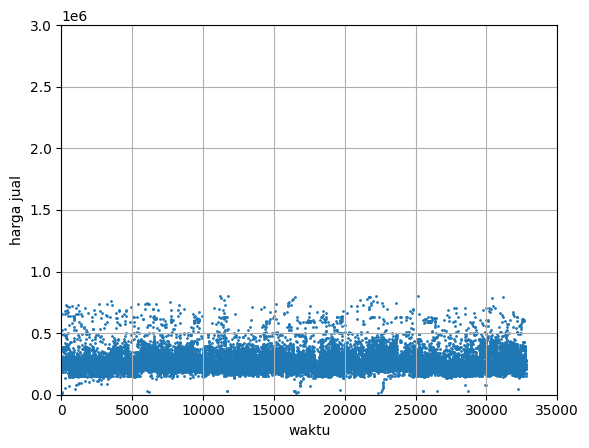

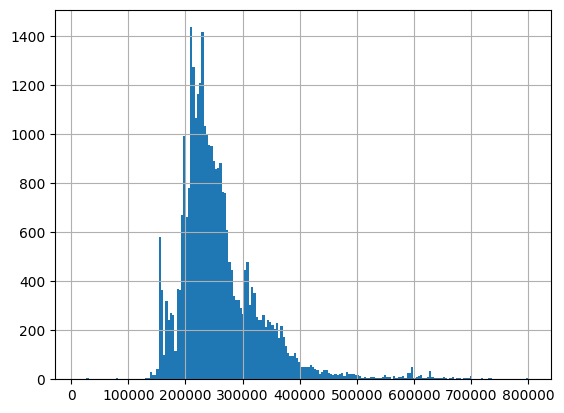

In [ ]:
plt.scatter(x, y, s=1)
plt.xlabel("waktu")
plt.ylabel("harga jual")
plt.ylim(0, 3000000)
plt.xlim(0, 35000)
plt.grid()
plt.show()
print("   ")

# harga yang pasar yang paling banyak dijual adalah dikisaran harga 200k
plt.hist(y, bins=200)
plt.grid()
plt.show()


In [ ]:
def gradientdescent(x, y, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0

    N = len(x)

    for i in range(N):
        dl_dw += -1*x[i] * (y[i] - (w*x[i] + b))
        dl_db += -1*(y[i] - (w*x[i] + b))

        w = w - (1/float(N)) * dl_dw * alpha
        b = b - (1/float(N)) * dl_dw * alpha
    return w, b


def costfucntion(x, y, w, b):
    N = len(x)
    totalerror = 0.0
    for i in range(N):
        totalerror += (y[i] - (w*x[i] - b))**2
    return totalerror / (2*float(N))

def train(x, y, w, b, alpha, n_iter):
    for i in range(n_iter):
        w, b = gradientdescent(x, y, w, b, alpha)
        if i%500 == 0:
            print("iteration", i, "cost", costfucntion(x, y, w, b))
    return w, b

def predict(x, w, b):
    return x*w+b





In [ ]:
w, b = train(x, y, 25000, 25000, 0.00000001, 10000)

x_new = 150000
y_new = predict(x_new, w, b)

x_train = x[26218:]
y_train = y[26218:]

x_test = x[:26218]
y_test = y[:26218]

y_prediction = list()
n = len(x_test)

for i in range(n):
    y_new = predict(x_test[i], w, b)
    y_prediction.append(y_new)



iteration 0 cost 1443697428370128.8


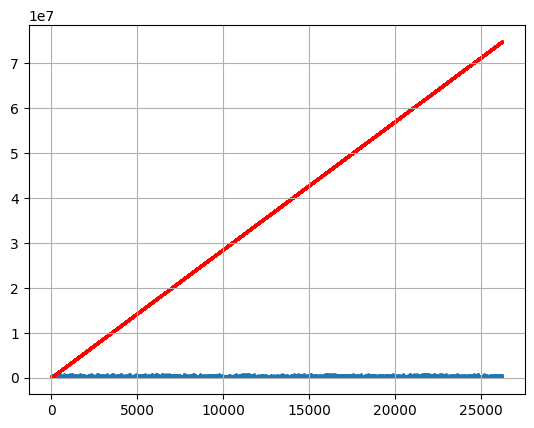

In [ ]:
plt.scatter(x_test, y_test, s = 1)
plt.scatter(x_test, y_prediction, c='r', s=1, zorder= 1)
plt.grid()
plt.show()

In [ ]:
# MSE
for i in range(len(y_test)):
    error = (y_test[i] - abs(y_prediction[i]))**2

mse = error / len(y_test)

print("mean squared error", mse)

mean squared error 211714064893.8212
